# Introdução à biblioteca Pandas

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Programming/datasets/Gapminder.csv", sep=";")

In [4]:
# usamos error_bad_lines para ignorar a linha 665, transformando ele de True para False:
# df = pd.read_csv("/content/drive/MyDrive/Programming/datasets/Gapminder.csv", error_bad_lines = False)
# o problema estava no separador, que costuma ser a vírgula, mas aqui (nesse arquivo) é o ponto e vírgula, por isso o uso de , sep = ";"
# .head mostra por padrão as cinco primeiras linhas, foi isso que mostrou o separador
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [5]:
#o .rename opera como um dicionário, fizemos a tradução
df = df.rename(columns={"country":"pais", "continent":"continente", "year":"ano", "lifeExp":"expectativa_de_vida", "pop":"pop_total", "gdpPercap":"pib"})


In [6]:
df.shape 
#(linhas, colunas)

(3312, 6)

In [7]:
df.columns

Index(['pais', 'continente', 'ano', 'expectativa_de_vida', 'pop_total', 'pib'], dtype='object')

In [8]:
df.dtypes 
#object=str

pais                    object
continente              object
ano                      int64
expectativa_de_vida    float64
pop_total                int64
pib                    float64
dtype: object

In [9]:
df.tail(15) 
#atenção à indexação de base 0

,pais,continente,ano,expectativa_de_vida,pop_total,pib
3297,Zambia,Africa,1997,40.238,9417789,1071.353818
3298,Zambia,Africa,2002,39.193,10595811,1071.613938
3299,Zambia,Africa,2007,42.384,11746035,1271.211593
3300,Zimbabwe,Africa,1952,48.451,3080907,406.884115
3301,Zimbabwe,Africa,1957,50.469,3646340,518.764268
3302,Zimbabwe,Africa,1962,52.358,4277736,527.272182
3303,Zimbabwe,Africa,1967,53.995,4995432,569.795071
3304,Zimbabwe,Africa,1972,55.635,5861135,799.362176
3305,Zimbabwe,Africa,1977,57.674,6642107,685.587682
3306,Zimbabwe,Africa,1982,60.363,7636524,788.855041


In [10]:
df.describe()
#count=número de linhas, mean=média, std=standard deviation, min=mínimo, quartis, max=máxima

,ano,expectativa_de_vida,pop_total,pib
count,3312.000000,3312.000000,3.312000e+03,3312.000000
mean,1980.301630,65.246871,3.161489e+07,11317.115805
std,16.927294,11.768412,1.041193e+08,11369.142739
min,1950.000000,23.599000,5.941200e+04,241.165876
25%,1967.000000,58.337500,2.678572e+06,2514.625266
50%,1982.000000,69.610000,7.557218e+06,7838.505123
75%,1996.000000,73.657750,1.958522e+07,17357.879170
max,2007.000000,82.670000,1.318683e+09,113523.132900


In [11]:
df["continente"].unique() 
#.unique = valores únicos de uma coluna

array(['Asia', 'Europe', 'Africa', 'Americas', nan, 'FSU', 'Oceania'],
      dtype=object)

In [12]:
oceania = df.loc[df["continente"] == "Oceania"] 
#loc=localização
oceania.head()

,pais,continente,ano,expectativa_de_vida,pop_total,pib
975,Fiji,Oceania,1962,56.494,421869,2039.393277
976,Fiji,Oceania,1967,58.607,485000,2170.073285
977,Fiji,Oceania,1972,60.642,544000,2797.759484
978,Fiji,Oceania,1977,62.669,599339,3182.569600
979,Fiji,Oceania,1982,64.683,658906,3209.257468


In [13]:
df.groupby("continente")["pais"].nunique()
#agrupa os países (.nunique() ajuda nisso) por continente e mostra a quantidade.

continente
Africa      51
Americas    25
Asia        41
Europe      35
FSU          6
Oceania      3
Name: pais, dtype: int64

In [14]:
#qual é a expectativa de vida média por ano?
df.groupby("ano")["expectativa_de_vida"].mean()

ano
1950    62.002568
1951    65.904167
1952    49.206867
1953    66.674563
1954    67.459817
1955    67.806757
1956    67.950637
1957    51.614590
1958    68.815936
1959    68.226579
1960    68.470837
1961    68.862480
1962    54.035234
1963    69.595735
1964    70.063105
1965    70.259881
1966    70.447526
1967    56.263629
1968    70.689081
1969    70.653896
1970    70.961141
1971    71.103976
1972    58.474481
1973    71.500338
1974    71.778504
1975    71.939218
1976    72.158050
1977    60.429090
1978    72.717567
1979    73.018717
1980    73.064524
1981    73.337399
1982    62.365871
1983    73.787778
1984    74.100741
1985    74.112222
1986    74.452222
1987    63.984860
1988    74.760000
1989    74.924444
1990    74.283438
1991    74.374848
1992    65.008443
1993    74.324545
1994    74.456667
1995    74.552727
1996    75.029394
1997    65.873799
1998    75.569697
1999    75.703636
2000    76.026364
2001    76.257879
2002    66.835695
2003    76.586667
2004    76.921562
2005  

In [15]:
#alternativa de média
df["pib"].mean()

11317.115804696648

In [16]:
#soma dos PIBs
df["pib"].sum() 

37482287.5451553

# Trabalhando com planilhas do excel

In [17]:
# import pandas as pd

df1 = pd.read_excel("/content/drive/MyDrive/Programming/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Programming/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Programming/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Programming/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Programming/datasets/Salvador.xlsx")

In [18]:
#verificando
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [19]:
#concatenar = unir um abaixo do outro
dfbr = pd.concat([df1,df2,df3,df4,df5])

In [20]:
#amostra aleatória
dfbr.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde
42,Aracaju,2018-01-01,40.00,1520,8
198,Salvador,2019-01-02,13.65,1037,3
11,Natal,2019-02-09,564.00,853,3
28,Recife,2019-01-01,123.69,983,3
55,Salvador,2019-01-01,36.62,1036,1
47,Natal,2018-03-13,521.00,854,3
21,Natal,2019-02-08,679.00,853,2
84,Salvador,2019-01-01,22.99,1036,1
41,Aracaju,2018-01-01,229.64,1520,8
199,Salvador,2019-01-02,153.87,1036,3


In [21]:
dfbr.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [22]:
#mudar tipo de dado
dfbr["LojaID"] = dfbr["LojaID"].astype("object")

In [23]:
#verificando
dfbr.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

## Valores faltantes

In [24]:
#descobrindo as linhas com valores nulos
dfbr.isnull().sum() #a soma de valores nulos
#era para ter 7 vendas vazias, mas parece que mudaram o arquivo.

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [26]:
#para substituir os valores nulos pela média
# inplace = True troca os dados na memória
dfbr["Vendas"].fillna(dfbr["Vendas"].mean(), inplace = True)

In [27]:
dfbr["Vendas"].mean()

122.61180089485458

In [28]:
#trocar valores nulos por zero
dfbr["Vendas"].fillna(0, inplace = True)

In [ ]:
#apagar as linhas com valores nulos
dfbr.dropna(inplace = True)
#só os valores nulos da coluna "Vendas"
dfbr.dropna(subset=["Vendas"], inplace = True)
#só se todas colunas da linha estão nulas
dfbr.dropna(how = "all", inplace = True)

## Criar colunas

In [29]:
#só inserir o nome da nova coluna
#.mul multiplica
dfbr["Receita"] = dfbr["Vendas"].mul(dfbr["Qtde"])

#teste
dfbr.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [30]:
#funções max e min funcionam em colunas
dfbr["Receita"].max()

3544.0

In [31]:
# .nlargest mostra os maiores. Você indica a quantidade e a coluna dos dados. O bom é que mostra todos os dados. Seu par é o .nsmallest

dfbr.nlargest(5, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0


In [32]:
dfbr["Receita"].min()

3.34

In [33]:
#agrupar (somar) os valores por cidade
#dataframe.groupby(coluna que será agrupada)[valor que será somado].sum
dfbr.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [34]:
#ordenar o conjunto de daos por algum parâmetro, aqui o parâmetro é a Receita e a ordem é descendente
dfbr.sort_values("Receita", ascending = False).head(15)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


##Trabalhando com datas

In [35]:
# transformar a coluna de data em int, porque geralmente é assim que aparece
dfbr["Data"] = dfbr["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [36]:
#teste
dfbr.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [37]:
#agora, mudando de int para data
dfbr["Data"] = pd.to_datetime(dfbr["Data"])

In [39]:
#teste
dfbr.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [40]:
#agrupar dados por ano: .dt.year
dfbr.groupby(dfbr["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [41]:
# o .dt.year também pode ser usado para criar colunas
dfbr["Ano_Venda"] = dfbr["Data"].dt.year

In [42]:
#teste
dfbr.sample(12)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
50,Aracaju,2018-01-01,7.52,1522,5,37.60,2018
111,Recife,2019-03-02,8.00,981,3,24.00,2019
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019
110,Natal,2019-01-02,185.93,1036,3,557.79,2019
158,Salvador,2019-01-02,183.64,1037,3,550.92,2019
187,Natal,2019-01-02,3.85,1035,3,11.55,2019
89,Salvador,2019-01-01,17.46,1034,1,17.46,2019
100,Natal,2019-01-02,190.97,1036,2,381.94,2019
230,Salvador,2019-01-03,184.69,1036,1,184.69,2019
197,Natal,2019-01-02,10.45,1036,2,20.90,2019


In [43]:
#pode=se usar o .dt para mexer com dia e mês
#a criação de colunas pode ocorrer em uma linha só
dfbr["Mes_Venda"], dfbr["Dia_Venda"] = (dfbr["Data"].dt.month, dfbr["Data"].dt.day)

In [44]:
#teste
#não parece, mas sample é random
dfbr.sample(12)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda
58,Natal,2018-12-23,272.00,853,3,816.00,2018,12,23
173,Natal,2019-01-02,31.77,1034,2,63.54,2019,1,2
51,Natal,2018-01-21,859.00,852,4,3436.00,2018,1,21
88,Recife,2019-01-01,180.24,980,6,1081.44,2019,1,1
51,Salvador,2019-01-01,13.37,1037,2,26.74,2019,1,1
24,Recife,2019-01-01,13.00,983,2,26.00,2019,1,1
229,Salvador,2019-01-02,43.08,1036,2,86.16,2019,1,2
96,Natal,2019-01-02,42.94,1034,3,128.82,2019,1,2
25,Recife,2019-01-01,161.60,982,5,808.00,2019,1,1
66,Fortaleza,2019-01-01,35.11,1005,6,210.66,2019,1,1


In [45]:
#é possível usar o .min() e o .max() com datas
dfbr["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [46]:
#calcular a diferença de dias 
#ou seja, podemos comparar duas colunas de datas OU as datas com uma data específica - nesse caso, pegamos as datas e subtraimos a data mais antiga (min)
dfbr["Diferenca_Dias"] = dfbr["Data"] - dfbr["Data"].min()

In [47]:
#teste
dfbr.sample(12)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias
59,Salvador,2019-01-01,138.27,1034,2,276.54,2019,1,1,365 days
201,Natal,2019-01-02,86.61,1036,1,86.61,2019,1,2,366 days
15,Fortaleza,2019-01-01,195.05,1002,2,390.10,2019,1,1,365 days
94,Fortaleza,2019-01-01,150.49,1003,5,752.45,2019,1,1,365 days
25,Salvador,2019-01-01,220.62,1035,1,220.62,2019,1,1,365 days
77,Recife,2019-01-01,102.82,981,6,616.92,2019,1,1,365 days
128,Salvador,2019-03-02,36.84,1034,1,36.84,2019,3,2,425 days
40,Aracaju,2018-01-01,6.99,1522,7,48.93,2018,1,1,0 days
156,Salvador,2019-01-02,36.14,1037,3,108.42,2019,1,2,366 days
13,Aracaju,2018-01-01,43.45,1522,10,434.50,2018,1,1,0 days


In [48]:
#criar uma coluna de trimestre
dfbr["Trimestre_Venda"] = dfbr["Data"].dt.quarter

In [49]:
#teste
dfbr.sample(12)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
177,Salvador,2019-01-02,41.19,1037,2,82.38,2019,1,2,366 days,1
93,Fortaleza,2019-01-01,35.25,1003,5,176.25,2019,1,1,365 days,1
83,Recife,2019-01-01,143.61,983,6,861.66,2019,1,1,365 days,1
17,Aracaju,2018-01-01,162.19,1522,9,1459.71,2018,1,1,0 days,1
57,Fortaleza,2019-01-01,129.07,1005,3,387.21,2019,1,1,365 days,1
120,Recife,2019-03-02,184.90,982,4,739.60,2019,3,2,425 days,1
28,Natal,2019-02-13,705.00,853,2,1410.00,2019,2,13,408 days,1
50,Fortaleza,2019-01-01,33.69,1005,3,101.07,2019,1,1,365 days,1
136,Salvador,2019-03-02,13.81,1036,1,13.81,2019,3,2,425 days,1
123,Recife,2019-03-02,20.22,981,6,121.32,2019,3,2,425 days,1


In [50]:
#filtrar por data: criar uma variável e usar .loc com os critérios
vendas_março_19 = dfbr.loc[(dfbr["Data"].dt.year == 2019) & (dfbr["Data"].dt.month == 3)]

In [51]:
vendas_março_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


## Visualização de Dados

In [52]:
#value_counts conta a quantidade de instâncias de algo. Aqui, mostra quantas vezes a uma loja apareceu, ou seja, realizou uma venda.
dfbr["LojaID"].value_counts(ascending = False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

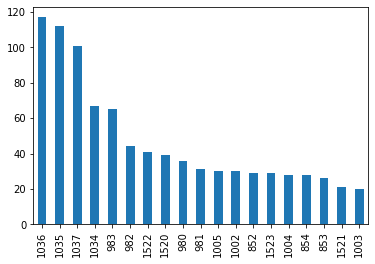

In [54]:
#essas métodos vem da matplotlib, que já vem com o Pandas
#repeti a informação anterior + .plot.bar(), para um gráfico de barras verticais
dfbr["LojaID"].value_counts(ascending = False).plot.bar()

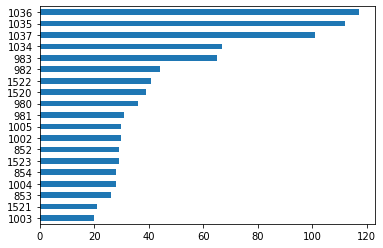

In [57]:
#barras horizontais e ascendente
#o ";" no final tira o nome ou descrição acima do gráfico (<matplotlib.axes._subplots.AxesSubplot at 0x7fb273f97d10>)
dfbr["LojaID"].value_counts(ascending = True).plot.barh();

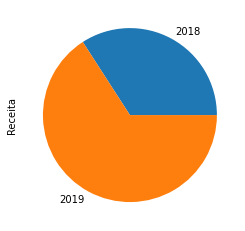

In [59]:
#gráfico de pizza, aproveitando dados anteriores
dfbr.groupby(dfbr["Data"].dt.year)["Receita"].sum().plot.pie()


In [60]:
#determinando vendas por cidade
dfbr["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

### Personalizar tabela

Text(0, 0.5, 'Vendas')

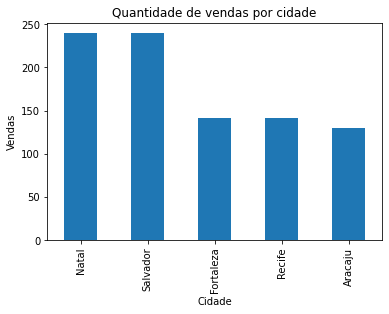

In [61]:
import matplotlib.pyplot as plt
#adicionar título 
dfbr["Cidade"].value_counts().plot.bar(title =  "Quantidade de vendas por cidade")
#alterar nome dos eixos
plt.xlabel("Cidade")
plt.ylabel("Vendas")

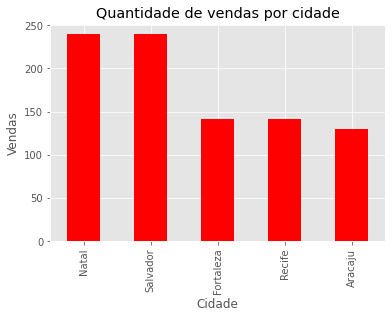

In [64]:
#alterar a cor
dfbr["Cidade"].value_counts().plot.bar(title =  "Quantidade de vendas por cidade", color = "red")
plt.xlabel("Cidade")
plt.ylabel("Vendas");

In [63]:
#alterar o estilo
#styles refrerence: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use("ggplot")

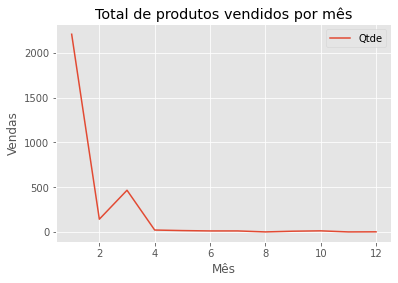

In [67]:
#gráfico de vendas por mês, só que mistura os dois anos
dfbr.groupby(dfbr["Mes_Venda"])["Qtde"].sum().plot(title = "Total de produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Vendas")
plt.legend()

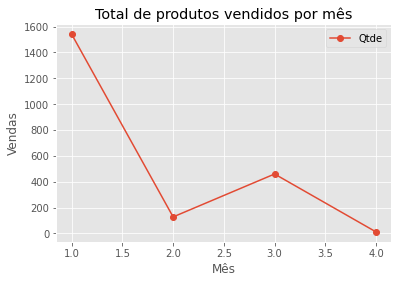

In [73]:
#para usarmos somente as vendas de 2019, criamos uma variável
dfbr_2019 = dfbr[dfbr["Ano_Venda"] == 2019]
# o marker adiciona esse pontinhos
dfbr_2019.groupby(dfbr_2019["Mes_Venda"])["Qtde"].sum().plot(title = "Total de produtos vendidos por mês", marker = "o")
plt.xlabel("Mês")
plt.ylabel("Vendas")
plt.legend()

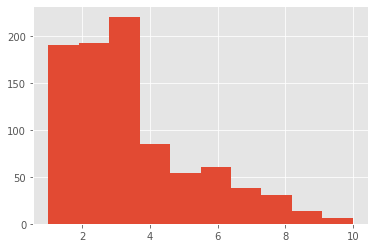

In [74]:
#histograma
plt.hist(dfbr["Qtde"]);

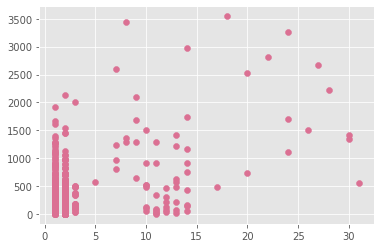

In [77]:
#scatter plot
#nomes de cores: https://matplotlib.org/stable/gallery/color/named_colors.html
plt.scatter(x = dfbr_2019["Dia_Venda"], y = dfbr_2019["Receita"], color = "palevioletred");

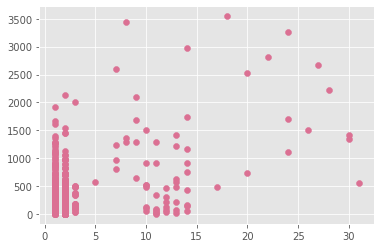

In [79]:
#salvar em png
plt.scatter(x = dfbr_2019["Dia_Venda"], y = dfbr_2019["Receita"], color = "palevioletred");
plt.savefig("meu primeiro graf PNG")

## Análise Exploratória

In [80]:
#import pandas as pd
#import matplotlib.pyplot. as plt
plt.style.use("bmh")

In [83]:
#outra forma de fazer upload de um arquivo. Importa temporariamente
# from google.colab import files
# arq = files.upload()

In [84]:
#criação do dataframe
adworks = pd.read_excel("/content/drive/MyDrive/Programming/datasets/AdventureWorks.xlsx")

In [85]:
#teste do dataframe
adworks.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [88]:
#determinar tamanho de linhas e colunas. A base está cortada.
adworks.shape

(904, 16)

In [89]:
adworks.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [90]:
#Cálculo da receita
adworks["Valor Venda"].sum()

5984606.1426

In [92]:
#custo
adworks["Custo Total"] = adworks["Custo Unitário"].mul(adworks["Quantidade"])

In [93]:
#teste
adworks.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [95]:
#Custo total com round (que não é recomendado para dinheiro)
round(adworks["Custo Total"].sum(), 2)

2486783.05

In [96]:
#criando e testando uma coluna de lucro
adworks["Lucro"] = adworks["Valor Venda"] - adworks["Custo Total"]

adworks.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [97]:
#lucro
round(adworks["Lucro"].sum(), 2)

3497823.09

In [98]:
#calculo do tempo de envio.
#1. cria coluna "Tempo de envio"
adworks["Tempo Envio"] = adworks["Data Envio"] - adworks["Data Venda"]

adworks.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5 days
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6 days
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6 days
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,7 days


In [99]:
# para saber a média de um tempo, é preciso transformá-lo em numérico
adworks["Tempo Envio"] = (adworks["Data Envio"] - adworks["Data Venda"]).dt.days

In [100]:
#teste
adworks["Tempo Envio"].dtype

dtype('int64')

In [101]:
#cálculo do tempo médio por marca
adworks.groupby("Marca")["Tempo Envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo Envio, dtype: float64

In [102]:
#missing values
adworks.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo Total       0
Lucro             0
Tempo Envio       0
dtype: int64

In [107]:
#lucro por ano E por marca
adworks.groupby([adworks["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [106]:
#formatação pelo Pandas
pd.options.display.float_format = "{:20,.2f}".format 
#não entendi o número 20...

In [108]:
#resetar o índice (adicionar um contador)
lucro_ano = adworks.groupby([adworks["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()

In [109]:
#teste
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [110]:
#quantidade de produtos vendidos
adworks.groupby("Produto")["Quantidade"].sum().sort_values(ascending = False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

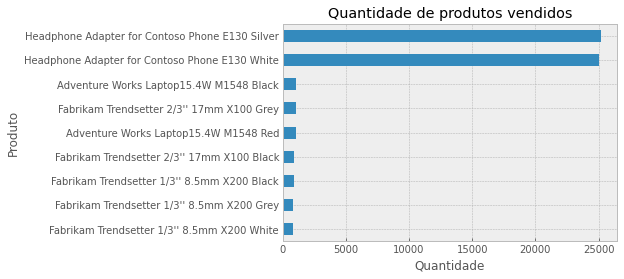

In [112]:
#tranforma o código anterior em gráfico
adworks.groupby("Produto")["Quantidade"].sum().sort_values(ascending = True).plot.barh(title = "Quantidade de produtos vendidos")
plt.xlabel("Quantidade")
plt.ylabel("Produto");

In [115]:
adworks.groupby(adworks["Data Venda"].dt.year)["Lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

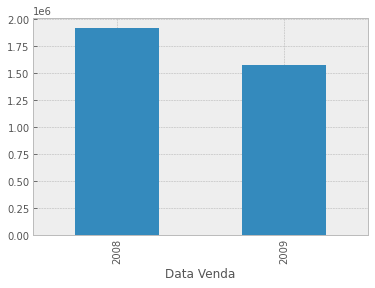

In [114]:
adworks.groupby(adworks["Data Venda"].dt.year)["Lucro"].sum().plot.bar();

In [117]:
#separar o ano de 2009
adworks_2019 = adworks[adworks["Data Venda"].dt.year == 2009]

adworks_2019.head(10)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro,Tempo Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4
16,2009-07-18,2009-07-23,306,384,19071,200907183CS760,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",5
17,2009-09-12,2009-09-21,307,384,19135,200909123CS725,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",9
18,2009-10-06,2009-10-17,307,384,19137,200910063CS727,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
28,2009-06-24,2009-07-06,199,1178,18958,200906244CS869,330.66,998.00,6,0.00,"5,988.00",Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,"1,983.96","4,004.04",12
29,2009-09-22,2009-10-01,307,1178,19135,200909224CS725,330.66,998.00,6,0.00,"5,988.00",Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,"1,983.96","4,004.04",9


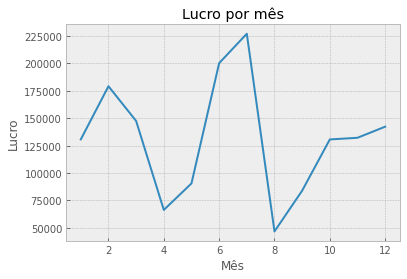

In [118]:
#calcular o lucro por mês para todas as marcas em 2009
adworks_2019.groupby(adworks_2019["Data Venda"].dt.month)["Lucro"].sum().plot(title = "Lucro por mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

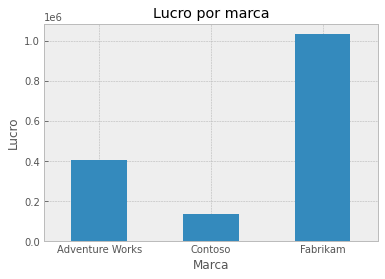

In [121]:
adworks_2019.groupby("Marca")["Lucro"].sum().plot.bar(title = "Lucro por marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
#coloca as legendas do eixo x na horizontal
plt.xticks(rotation = "horizontal");

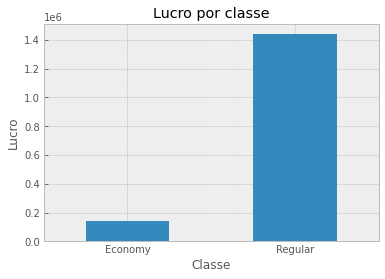

In [122]:
adworks_2019.groupby("Classe")["Lucro"].sum().plot.bar(title = "Lucro por classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation = "horizontal");

In [123]:
#fazendo uma análise mais detalhada do tempo de envio
adworks["Tempo Envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

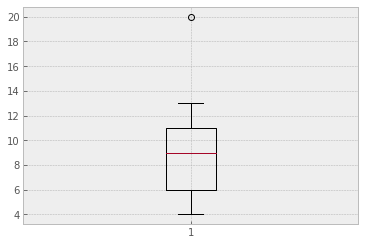

In [124]:
#gráfico de boxplot
plt.boxplot(adworks["Tempo Envio"]);

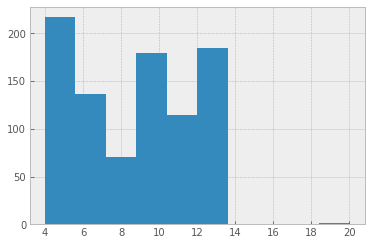

In [125]:
#histograma
plt.hist(adworks["Tempo Envio"]);

In [126]:
#tempo mínimo de envio, dá para fazer o máximo também
adworks["Tempo Envio"].min()

4

In [127]:
#identificando o outlier (20 dias)
adworks[adworks["Tempo Envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [128]:
#como salvar como csv
adworks.to_csv("adworks_vendas_editado", index = False)